In [3]:
import numpy as np
import pandas as pd
import os


In [4]:
os.chdir('D:\Datasets\Digit_Recognizer')

In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y=df['label']

In [8]:
X=df.drop('label',axis=1)

In [15]:
X=X/255

In [16]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [11]:
# Convert y into categorical values

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y=to_categorical(y,num_classes=10)

In [14]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model=Sequential()
model.add(Dense(20,activation='relu',input_shape=(784,)))
model.add(Dense(25,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 20)                15700     
                                                                 
 dense_2 (Dense)             (None, 25)                525       
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
Total params: 16,485
Trainable params: 16,485
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X,y,epochs=30,batch_size=32)

Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4165 - accuracy: 0.8844
Epoch 2/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2168 - accuracy: 0.9369
Epoch 3/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1799 - accuracy: 0.9485
Epoch 4/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1582 - accuracy: 0.9549
Epoch 5/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1437 - accuracy: 0.9586
Epoch 6/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1327 - accuracy: 0.9618
Epoch 7/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1246 - accuracy: 0.9636
Epoch 8/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1195 - accuracy: 0.9655
Epoch 9/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1134 - accuracy: 0.9678
Epoch 10/30
1313/1313 [==============================] - 2s 2ms/step - loss: 0.108

## Save the model

In [ ]:
model.save('digit_recognizer_with_NN.h5')

# Test Model

In [25]:
df_test=pd.read_csv('test.csv')

In [26]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_test.shape

(28000, 784)

In [40]:
input1=df_test.iloc[10]

In [41]:
input1.shape

(784,)

In [42]:
input1=input1.values.reshape(1,784)

In [43]:
(model.predict(input1)).argmax()

1/1 [==============================] - 0s 16ms/step


5

## validate with image

In [44]:
img=input1.reshape(28,28)

In [45]:
import matplotlib.pyplot as plt

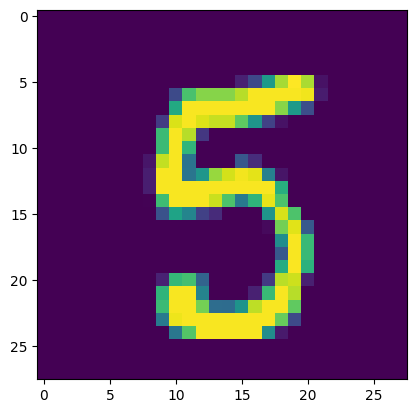

In [46]:
plt.imshow(img)